## Problem statement
- You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the   client data, you are also provided with the information of the call such as the duration of the call, day 
  and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

> From above statment we can get to know that this is a **binary classification problem**  as the output is **yes** or **no**.

## Process of our project
- Explore the dataset
- Visualize the data
- Clean the data(if required)
- Build a logistic regression model that can predict the test data.

In [7]:
#importing necessary libraries

import pandas as pd # used for data analysis and data manipulation
import numpy as np # used for numerical operations on data
import matplotlib.pyplot as plt # for plotting 
%matplotlib inline
import seaborn as sns # for plots
import warnings  # for ignoring warnings                  
warnings.filterwarnings("ignore")

In [8]:
# load the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
train.shape,test.shape

((31647, 18), (13564, 17))

- There are 31647 rows and 18 columns in our train data
- In test data we have 13564 rows and 17 coulmns
- Here rows specifies no. of data points and columns are our features/attributes of our data

In [10]:
train.head() # Returns top 5 rows in train data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [11]:
test.tail() # returns last 5 rows in test data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [12]:
train.columns # returns column names in train data

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [13]:
test.columns # returns column names in test data

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [8]:
train.dtypes # returns data types of each column in train data

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

- object refers to categorical data.
- int64 is integer variables.

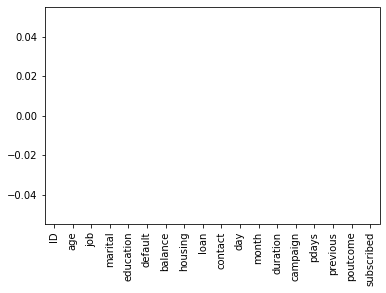

In [19]:
df=train.isnull()   # checking whether there are any missing values in our data.
df.sum().plot.bar() 

- we can see that there are no missing values in our data.

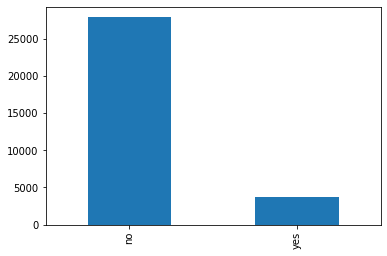

In [20]:
df1=train['subscribed'].value_counts() 
df1.plot.bar() 

- In 3715 users out of total 31647 have subscribed which is around 12%

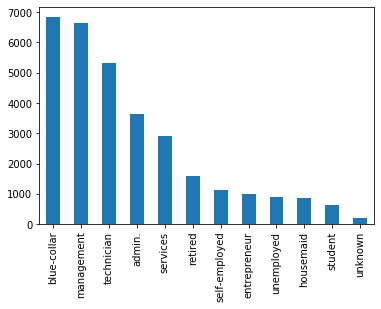

In [21]:
train['job'].value_counts().plot.bar()

- Most of our clients belong to blue-collar jobs and least from students.

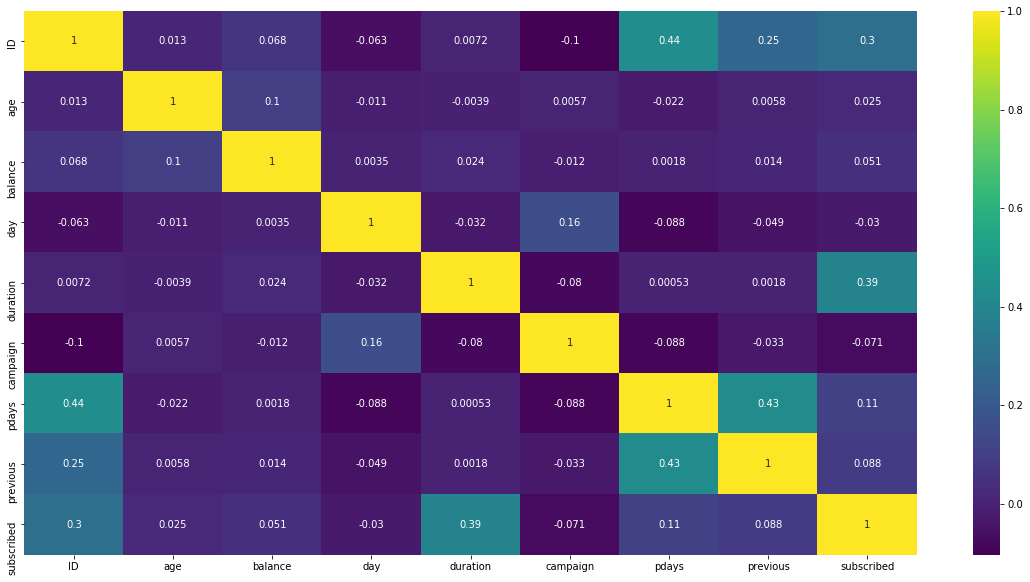

In [29]:
#correlation plot

corr = train.corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,annot=True, cmap="viridis")

- we can see that there are no highly correlated variables.

In [23]:
#replacing yes and no with 1 and 

train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [37]:
X = train.iloc[:,:-1] 
y = train.iloc[:,-1] #target variable

In [93]:
X.shape,y.shape

((31647, 17), (31647,))

In [100]:
data= pd.get_dummies(X)
data.shape

(31647, 52)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2) #split data into train and test

In [103]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25317, 52), (6330, 52), (25317,), (6330,))

# logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression 

In [105]:
model = LogisticRegression() #define logistic regression model.

In [106]:
model.fit(X_train, y_train) #fit data into model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
y_pred = model.predict(X_test) #predictions on the test data set

In [108]:
from sklearn.metrics import classification_report

In [109]:
accuracy_score(y_test, y_pred) #calculating accuracy of our model

0.8966824644549763

# decision tree

- we will do grid search cv for getting best parameters

In [110]:
from sklearn.model_selection import GridSearchCV 
#grid search cross validation
#hyper parameter tuning

In [111]:
model_tune = DecisionTreeClassifier()
tuned_parameter = [{'criterion':['gini','entropy'],'max_depth':range(2,10)}]

In [112]:
clf= GridSearchCV(model_tune,param_grid=tuned_parameter,cv=10,scoring='roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             pre_dis

In [113]:
clf.best_params_    #gives the best parameters with which accuracy can be improved

{'criterion': 'entropy', 'max_depth': 5}

In [118]:
#building a new model based on best parameters from grid search cv

model1=DecisionTreeClassifier(criterion='entropy',max_depth=5) 

In [119]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [120]:
y_pred=model1.predict(X_test)

In [121]:
accuracy_score(y_test, y_pred) #calculating the accuracy of our new model

0.9015797788309636

- The accuracy was little better compared to logistic regression but the overall accuracy is good.

In [130]:
test = pd.get_dummies(test) #creating dummies for test data set

In [131]:
test_prediction = model1.predict(test) #predicting values for test data

In [132]:
submission = pd.DataFrame() #creating a new data frame

In [134]:
submission['ID'] = test['ID'] #assigning ID column of test data to submission data frame

In [136]:
submission['subscribed'] = test_prediction #assigning predicted values to a new column subscribed

In [137]:
submission['subscribed'].replace(0,'no',inplace=True) #replace with yes and no as of our original data
submission['subscribed'].replace(1,'yes',inplace=True)

In [141]:
submission.to_csv('submissions.csv', header=True, index=False) #saving the data into a new csv file